C:\Users\nexus\AppData\Local\Temp\ipykernel_31456\1089176809.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../city_temperature.csv", sep=",")


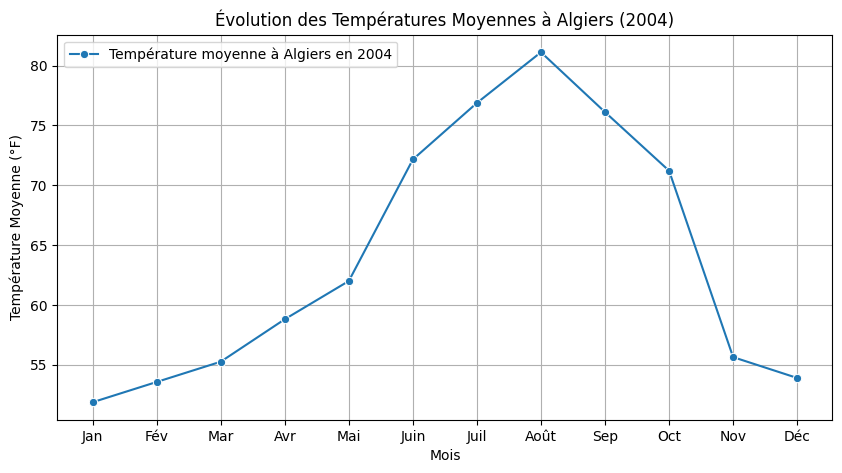

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données (remplace 'dataset.csv' par ton fichier réel)
df = pd.read_csv("../city_temperature.csv", sep=",")

# Nettoyer les noms de colonnes pour éviter les erreurs dues aux espaces
df.columns = df.columns.str.strip()

# Filtrer les données pour Algiers en 1995
ville = "Algiers"
annee = 2004

df_ville = df[(df["City"] == ville) & (df["Year"] == annee)]

# Vérifier s'il y a des données après filtrage
if df_ville.empty:
    print(f"Aucune donnée trouvée pour {ville} en {annee}. Vérifie les valeurs dans le fichier.")
else:
    # Calculer la température moyenne par mois
    df_monthly = df_ville.groupby("Month")["AvgTemperature"].mean()

    # Tracer le graphique
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df_monthly.index, y=df_monthly.values, marker="o", label=f"Température moyenne à {ville} en {annee}")

    # Personnalisation du graphique
    plt.title(f"Évolution des Températures Moyennes à {ville} ({annee})")
    plt.xlabel("Mois")
    plt.ylabel("Température Moyenne (°F)")
    plt.xticks(range(1, 13), ["Jan", "Fév", "Mar", "Avr", "Mai", "Juin", "Juil", "Août", "Sep", "Oct", "Nov", "Déc"])
    plt.legend()
    plt.grid()

    # Affichage
    plt.show()

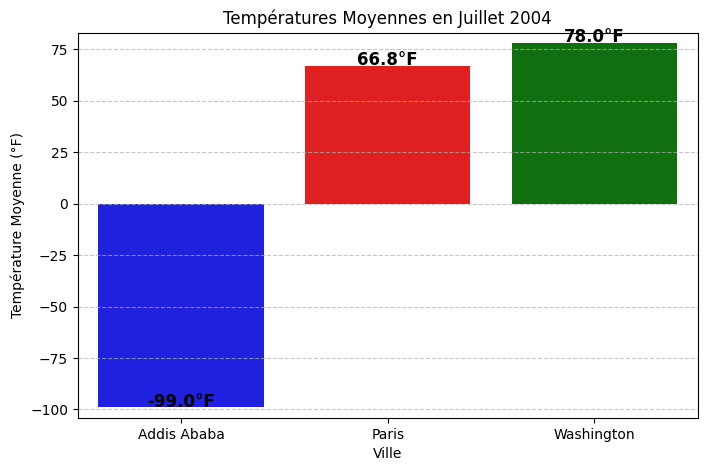

In [3]:
# Nettoyer les noms de colonnes pour éviter les erreurs dues aux espaces
df.columns = df.columns.str.strip()

# Convertir les colonnes en types appropriés
df["Year"] = df["Year"].astype(int)
df["Month"] = df["Month"].astype(int)

# Sélection des villes et de la période (Juillet 2004)
villes = ["Paris", "Washington", "Addis Ababa"]
mois = 7  # Juillet
annee = 2004

# Filtrer les données pour les villes sélectionnées en juillet 2004
df_villes = df[(df["City"].isin(villes)) & (df["Month"] == mois) & (df["Year"] == annee)]

# Vérifier s'il y a des données après filtrage
if df_villes.empty:
    print(f"Aucune donnée trouvée pour {villes} en {mois}/{annee}. Vérifie les valeurs dans le fichier.")
else:
    # Calculer la température moyenne pour chaque ville
    df_moyennes = df_villes.groupby("City")["AvgTemperature"].mean().reset_index()

    # Tracer un diagramme en barres
    plt.figure(figsize=(8, 5))
    colors = ["blue", "red", "green"]  # Couleurs distinctes pour chaque ville
    sns.barplot(x="City", y="AvgTemperature", hue="City", data=df_moyennes, palette=colors, legend=False)

    # Ajouter les valeurs sur les barres
    for index, row in df_moyennes.iterrows():
        plt.text(index, row["AvgTemperature"] + 0.5, f"{row['AvgTemperature']:.1f}°F", ha='center', fontsize=12, fontweight='bold')

    # Personnalisation du graphique
    plt.title(f"Températures Moyennes en Juillet {annee}")
    plt.xlabel("Ville")
    plt.ylabel("Température Moyenne (°F)")
    plt.ylim(min(df_moyennes["AvgTemperature"]) - 5, max(df_moyennes["AvgTemperature"]) + 5)
    plt.grid(axis='y', linestyle="--", alpha=0.7)

    # Affichage
    plt.show()

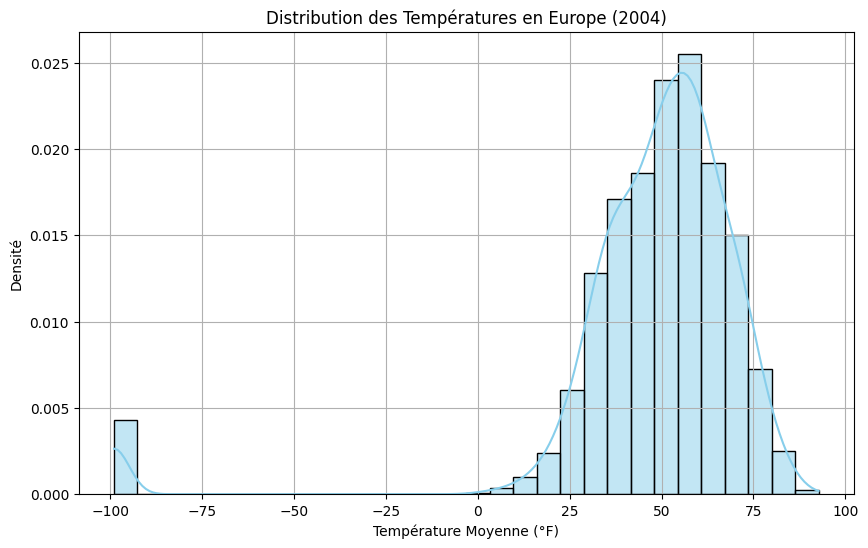

In [4]:
# Sélectionner une région spécifique, ici l'Europe
region = "Europe"  # Remplacer par la région que tu souhaites

# Filtrer les données par région et année
df_region = df[df["Region"] == region]

# Vérifier si des données existent pour la région spécifiée
if df_region.empty:
    print(f"Aucune donnée trouvée pour la région {region}. Vérifie les valeurs dans le fichier.")
else:
    # Sélectionner les données pour une année spécifique, par exemple 2004
    annee = 2004
    df_annee = df_region[df_region["Year"] == annee]

    # Vérifier s'il y a des données après filtrage
    if df_annee.empty:
        print(f"Aucune donnée trouvée pour la région {region} en {annee}. Vérifie les valeurs dans le fichier.")
    else:
        # Tracer un histogramme de la distribution des températures
        plt.figure(figsize=(10, 6))
        sns.histplot(df_annee["AvgTemperature"], kde=True, bins=30, color='skyblue', stat="density")

        # Personnalisation du graphique
        plt.title(f"Distribution des Températures en {region} ({annee})")
        plt.xlabel("Température Moyenne (°F)")
        plt.ylabel("Densité")
        plt.grid(True)

        # Affichage
        plt.show()

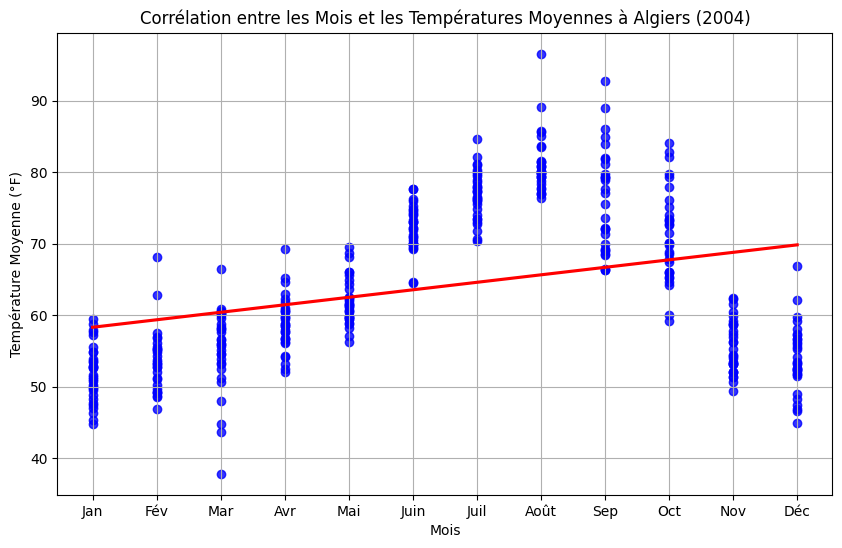

In [5]:
# Sélectionner une ville et une année, par exemple Algiers en 2004
ville = "Algiers"
annee = 2004

df_ville = df[(df["City"] == ville) & (df["Year"] == annee)]

# Vérifier s'il y a des données après filtrage
if df_ville.empty:
    print(f"Aucune donnée trouvée pour {ville} en {annee}. Vérifie les valeurs dans le fichier.")
else:
    # Tracer le nuage de points avec la régression
    plt.figure(figsize=(10, 6))
    sns.regplot(x="Month", y="AvgTemperature", data=df_ville, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ci=None)

    # Personnalisation du graphique
    plt.title(f"Corrélation entre les Mois et les Températures Moyennes à {ville} ({annee})")
    plt.xlabel("Mois")
    plt.ylabel("Température Moyenne (°F)")
    plt.xticks(range(1, 13), ["Jan", "Fév", "Mar", "Avr", "Mai", "Juin", "Juil", "Août", "Sep", "Oct", "Nov", "Déc"])
    plt.grid(True)

    # Affichage
    plt.show()